In [ ]:
%%writefile requirements.txt
flake8
mypy
pylint
pytest
radon
typing
pdfminer.six
PyPDF2
pdfplumber
rapidocr-onnxruntime
pymupdf
#docstring
Pillow
pytesseract
tesseract
pdf2image
pdfminer
striprtf
opencv-python
pymupdf
imutils
langdetect
scikit-image


Writing requirements.txt


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user


In [ ]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.4/404.4 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
!python read_docs.py

python3: can't open file '/content/read_docs.py': [Errno 2] No such file or directory


In [ ]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.6 MB/s eta 0:00:00


In [ ]:
!pip install PyPDF2

  Using cached pypdf2-3.0.1-py3-none-any.whl.metadata (6.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 17.1 MB/s eta 0:00:00


In [ ]:
import PyPDF2

def pdf_to_text(pdf_path, output_txt):
    # Open the PDF file in read-binary mode
    with open(pdf_path, 'rb') as pdf_file:
        # Create a PdfReader object instead of PdfFileReader
        pdf_reader = PyPDF2.PdfReader(pdf_file)

        # Initialize an empty string to store the text
        text = ''

        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()

    # Write the extracted text to a text file
    with open(output_txt, 'w', encoding='utf-8') as txt_file:
        txt_file.write(text)


In [ ]:
import os
for file in os.listdir("./data_pdf"):
    if file.endswith(".pdf"):
        pdf_to_text(os.path.join("./data_pdf", file),os.path.join("./data_txt", file.replace('.pdf', '.txt')))

In [ ]:
import re
from collections import Counter
import os
import pandas as pd
import matplotlib.pyplot as plt

def word_frequency(textfile: str):

    with open(textfile, 'r') as file:
        text = file.read()

    #  usuwanie znaków specjalnych, zamiana na małe litery

    preproc_name = re.sub(r"[.,\-\'\:\;\_\/\\()\"!?=&[]]", " ", text)
    preproc_name = re.sub(r' +', ' ', preproc_name).strip().lower()

    words = preproc_name.split()

    words = [word for word in words if len(word)>1 and word.isalpha()]


    word_counts = Counter(words)

    return word_counts

def aggregate_word_frequencies(file_list):
    '''
    Param:
    file_list : list of str
        A list of file paths to text files that need to be processed.

    Return:
    df : pandas.DataFrame
        A DataFrame with two columns:
        - 'word': unique words that appear across all the files
        - 'frequency': the total number of occurrences of each word across all files
        The DataFrame is sorted in descending order by frequency, with the most frequent words first.

    '''
    total_word_counts = Counter()

    for textfile in file_list:

        word_counts = word_frequency(textfile)

        total_word_counts.update(word_counts)


    df = pd.DataFrame(total_word_counts.items(), columns=['word', 'frequency'])

    df = df.sort_values(by='frequency', ascending=False).reset_index(drop=True)



    return df


file_list = [os.path.join('./data_txt', file) for file in os.listdir("./data_txt") if file.endswith('.txt')]

final_word_counts = aggregate_word_frequencies(file_list)

print(len(final_word_counts))

final_word_counts[-50:]


40104


,word,frequency
40054,kwanzaa,1
40055,lanka,1
40056,sri,1
40057,terroranschläge,1
40058,mob,1
40059,islamistischen,1
40060,christmesse,1
40061,noahs,1
40062,betriebener,1
40063,frostim,1


In [ ]:
#threshold setting -> lets say at least 3 times
final_word_counts = final_word_counts[final_word_counts['frequency'] >=3]



def zipf(id, freq):
  return 1/id*freq
max_freq = final_word_counts['frequency'].max()
final_word_counts['zipf'] = final_word_counts.apply(lambda x: int(round(zipf(final_word_counts.index.get_loc(x.name) + 1,max_freq),0)), axis=1)



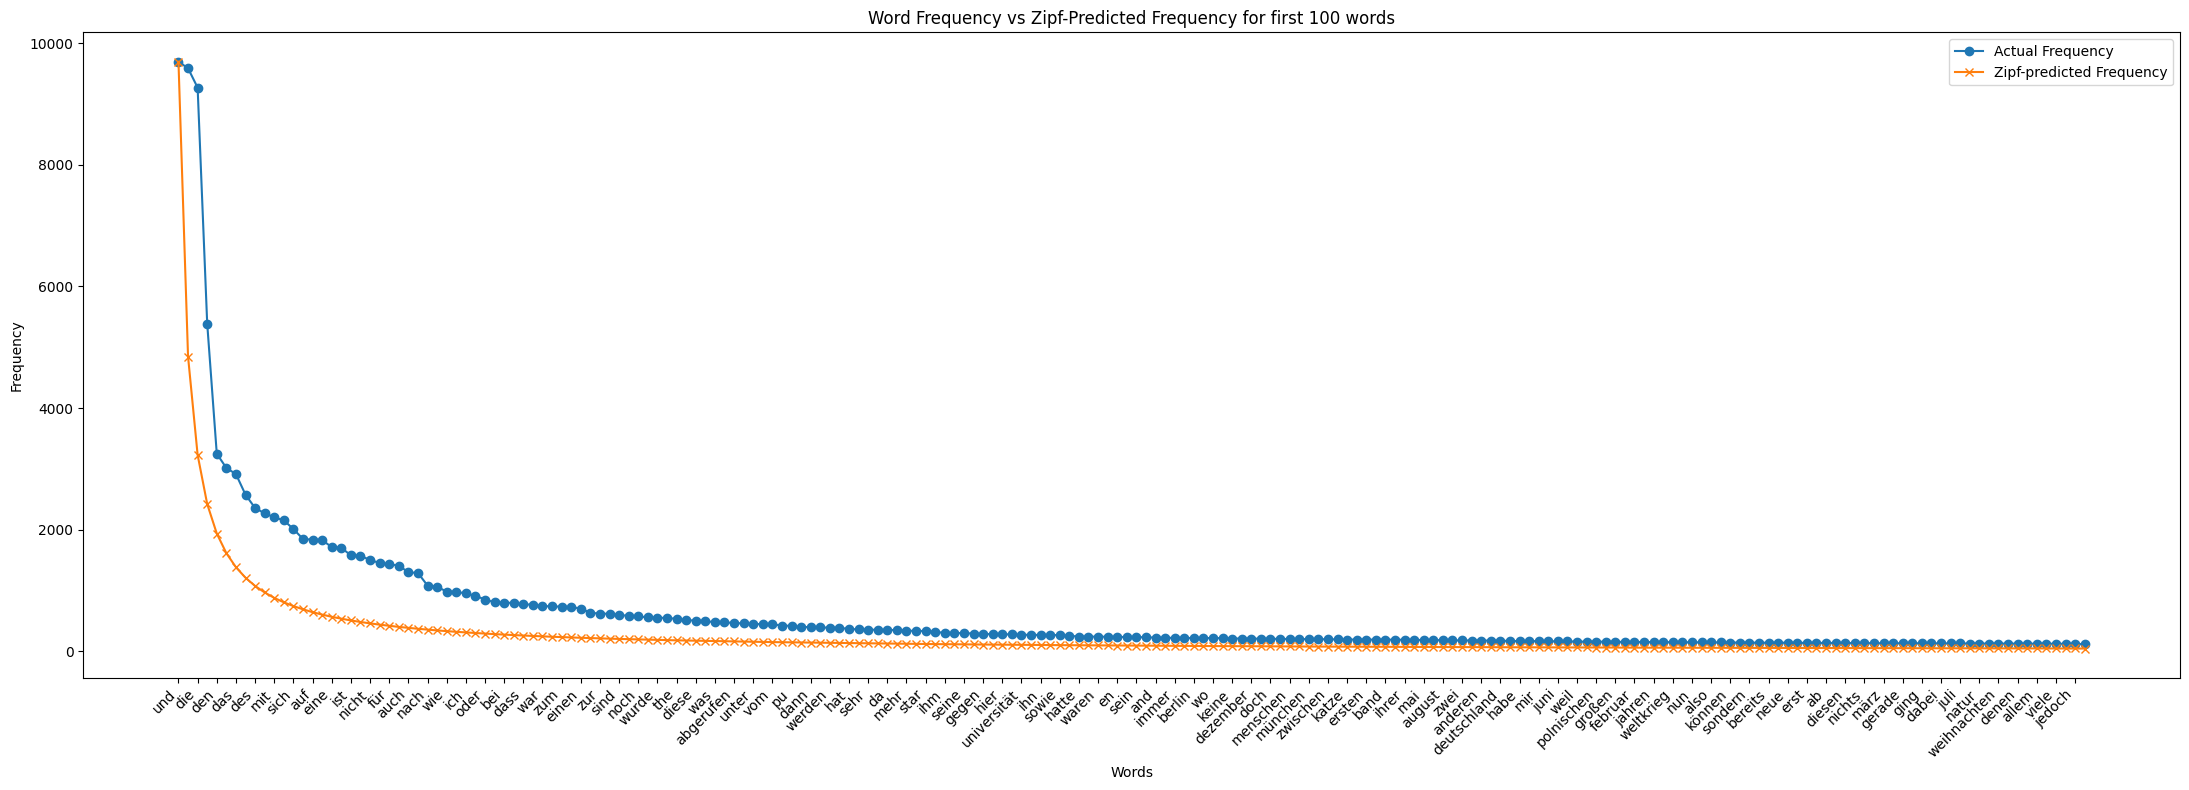

In [ ]:
final_word_counts = final_word_counts[:200]
plt.figure(figsize=(22,8))
plt.plot(final_word_counts['word'], final_word_counts['frequency'], marker='o', label='Actual Frequency')
plt.plot(final_word_counts['word'], final_word_counts['zipf'], marker='x', label='Zipf-predicted Frequency')

# Step 5: Customize the plot
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency vs Zipf-Predicted Frequency for first 100 words')
plt.xticks(ticks=range(0, len(final_word_counts), 2),  # Show every 2th word on x-axis
           labels=final_word_counts['word'][::2],  # Use every 2th word as label
           rotation=45, ha='right')  # Rotate x labels if needed
plt.legend()
plt.tight_layout()

# Step 6: Show the plot
plt.show()

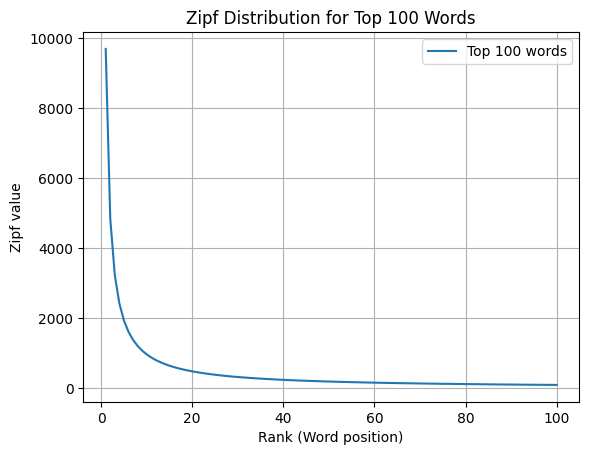

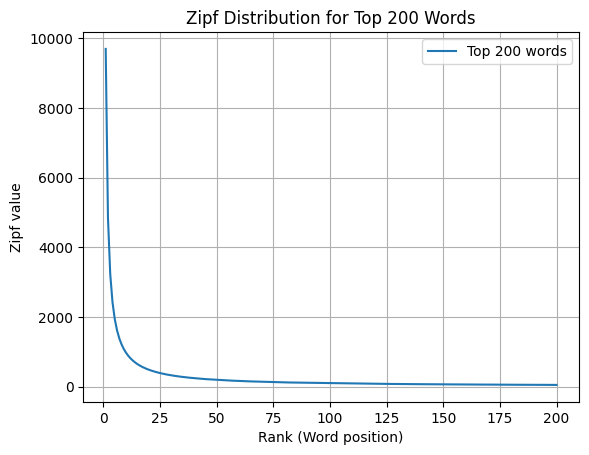

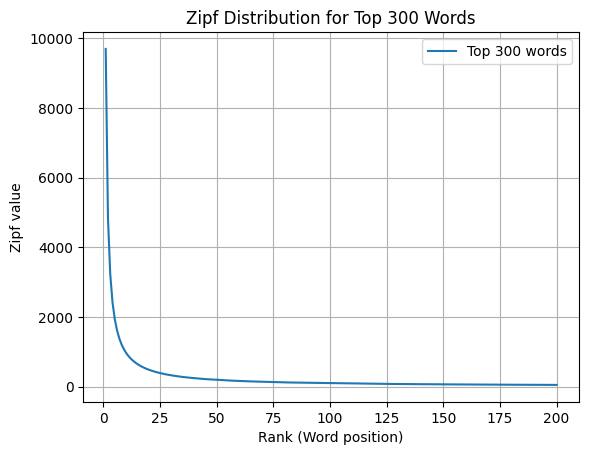

In [ ]:
import matplotlib.pyplot as plt

def plot_zipf_distribution(df, word_counts):
    """
    Plot Zipf distribution for different numbers of top words.

    :param df: DataFrame containing word frequencies and Zipf values
    :param word_counts: List of different counts of top words to plot
    """
    for count in word_counts:
        subset = df.head(count)


        plt.figure()


        plt.plot(subset.index + 1, subset['zipf'], label=f'Top {count} words')


        plt.xlabel('Rank (Word position)')
        plt.ylabel('Zipf value')
        plt.title(f'Zipf Distribution for Top {count} Words')
        plt.legend()
        plt.grid(True)


        plt.show()


plot_zipf_distribution(final_word_counts, [100, 200, 300])


In [ ]:
import re
from sklearn.feature_extraction.text import CountVectorizer
import os
file_list = [os.path.join('./data_txt', file) for file in os.listdir("./data_txt") if file.endswith('.txt')]
all_texts = []

for filename in file_list:
    with open(filename, 'r', encoding='utf-8') as file:
        text = file.read()

    preproc_name = re.sub(r"[.,\-\'\:\;\_\/\\()\"!?=&[]]", " ", text)
    preproc_name = re.sub(r' +', ' ', preproc_name).strip().lower()

    words = preproc_name.split()

    words = [word for word in words if len(word)>1 and word.isalpha()]
    all_texts.append(' '.join(words))

all_text = ' '.join(all_texts)[:100000]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
vectorizer = CountVectorizer(ngram_range=(1, 1))  # Unigrams
X = vectorizer.fit_transform([all_text])

# Create the co-occurrence matrix
Xc = (X.T * X)  # This is the co-occurrence matrix (word x word)
Xc.setdiag(0)  # Set diagonal to 0 (no self-co-occurrence)
co_occurrence_matrix = Xc.toarray()

# Get the vocabulary (words)
vocab = vectorizer.get_feature_names_out()

# Display word pair counts using Counter
word_pairs = Counter()
for i in range(len(vocab)):
    for j in range(i + 1, len(vocab)):
        if co_occurrence_matrix[i, j] > 0:  # Only count pairs with non-zero co-occurrence
            word_pairs[(vocab[i], vocab[j])] = co_occurrence_matrix[i, j]

# Show some word pairs and their counts
print(word_pairs.most_common(10))

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
cooccurrence_data = word_pairs.most_common(100)
# Add edges from the co-occurrence data
for word_pair, count in cooccurrence_data:
    word1, word2 = word_pair
    G.add_edge(word1, word2, weight=count)

# Set up position layout for nodes (circular layout, or spring layout works too)
pos = nx.spring_layout(G, seed=42, k= 3.0)

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=2000)

# Draw the edges with weights
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[edge[2]['weight'] / 50000 for edge in edges], edge_color='gray')

# Draw labels for the nodes
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Draw the edge labels (optional, if you want to show the weights)
edge_labels = {(edge[0], edge[1]): edge[2]['weight'] for edge in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the plot
plt.title("Word Co-occurrence Graph", size=15)
plt.axis("off")  # Hide the axis
plt.show()